In [1]:
# import neccessary packages and libraries
import os
from collections import defaultdict

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# to render plots in the notebook
%matplotlib inline

import seaborn as sns
# set a theme for seaborn
sns.set_theme()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# import local module containing the neccessary functions
import utils_functions as uf

# forces the interpreter to re-import the module
import importlib
importlib.reload(uf);

# Data Overview

The well known questions and answers website Stack Overflow has been conducted annual surveys for a decade now.  These are the largest and the most comprehensive surveys of coders ever conducted. The anonymized results of the surveys are publicly available for analysis at [Stack Overflow Anual Developer Survey](https://insights.stackoverflow.com/survey).

The 2020 Stack Overflow Survey was conducted in February 2020, just before the COVID-19 pandemic affected the entire world. The survey consists of 60 questions distributed over six sections:

1. Basic Information
2. Education, Work, Career
3. Technology and Tech Culture
4. Stack Overflow Usage + Community
5. Demographic Information
6. Survey Opinion and Final Questions

The survey had 64461 (almost 65k) responses from 184 countries and regions.

## Upload Data and Check the Uploads

There are two csv files:
 - `results_public.csv` contains the survey results;
 - `results_schema.csv` contains the list of columns in the first file, together with their associated questions. 

In [120]:
# create a path string
mypath = os.getcwd()

# upload the datafiles as pandas dataframes
df = pd.read_csv(mypath+'/data/survey20_results_public.csv', low_memory=False)
dfs = pd.read_csv(mypath+'/data/survey20_results_schema.csv', low_memory=False)

In [4]:
# option to display the full text of the string columns
pd.set_option('display.max_colwidth', None)

In [121]:
# peek at the survey file
df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


In [7]:
# peek at the description file
dfs.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"


## General Data Information

In [8]:
# get the shape of the data
df.shape

(64461, 61)

In [9]:
# save the column names as a list for later investigation
cols = list(dfs.Column.unique())
print(cols)

['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']


In [10]:
# general data information including the non-null values
#df.info();

In [11]:
# get the number of NaN values in each column
df_null = df.isnull().sum()
#df_null

In [12]:
# the columns with no missing data
no_null = set(df.columns[np.sum(df.isnull()) == 0]) 
no_null

{'Respondent'}

In [13]:
# there are no columns with more than 50% values missing
most_missing_cols = df.columns[df.isnull().mean() > 0.50]
most_missing_cols

Index([], dtype='object')

In [14]:
# most missing values, in descending order, written as percentages
df.isnull().mean().sort_values(ascending=False).round(3)

ConvertedComp             0.461
CompTotal                 0.460
NEWPurchaseResearch       0.421
PurchaseWhat              0.389
WebframeDesireNextYear    0.379
                          ...  
Employment                0.009
Country                   0.006
MainBranch                0.005
Hobbyist                  0.001
Respondent                0.000
Length: 61, dtype: float64

In [15]:
# columns with more than 30% of the values missing
most_missing_vals = df.columns[df.isnull().mean() > 0.30]
most_missing_vals

Index(['CompFreq', 'CompTotal', 'ConvertedComp', 'DatabaseDesireNextYear',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWOnboardGood',
       'NEWOvertime', 'NEWPurchaseResearch', 'OrgSize', 'PurchaseWhat',
       'Sexuality', 'WebframeDesireNextYear', 'WebframeWorkedWith',
       'WorkWeekHrs'],
      dtype='object')

In [16]:
# look at the numerical data
df.describe().round(2) 

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.00,45446.00,3.482600e+04,34756.00,41151.00
mean,32554.08,30.83,3.190464e+242,103756.05,40.78
std,18967.44,9.59,inf,226885.30,17.82
min,1.00,1.00,0.000000e+00,0.00,1.00
25%,16116.00,24.00,2.000000e+04,24648.00,40.00
50%,32231.00,29.00,6.300000e+04,54049.00,40.00
75%,49142.00,35.00,1.250000e+05,95000.00,44.00
max,65639.00,279.00,1.111111e+247,2000000.00,475.00


#### Observations on the numerical data:
- the column with most missing values is `ConvertedComp`, almost half of the values are missing;
- more than 30% values are missing in the `WorkWeekHours`;
- there are outliers in the numerical columns, as we can see from min/max values.

## Specific Information from Data

### Distribution by country

In [17]:
# the number of countries involved
len(df.Country.unique())

184

In [18]:
# distribution of respondents per country
country_counts = df.Country.value_counts()
country_counts.head()

United States     12469
India              8403
United Kingdom     3896
Germany            3890
Canada             2191
Name: Country, dtype: int64

In [19]:
# distribution of respondents on countries through percentages
df.Country.value_counts(normalize=True) * 100

United States                         19.460919
India                                 13.114933
United Kingdom                         6.080659
Germany                                6.071295
Canada                                 3.419590
                                        ...    
Mali                                   0.001561
Micronesia, Federated States of...     0.001561
Marshall Islands                       0.001561
Grenada                                0.001561
Fiji                                   0.001561
Name: Country, Length: 183, dtype: float64

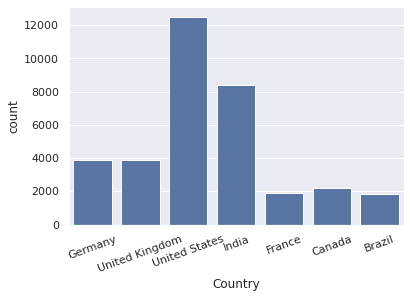

In [20]:
# the most represented countries, with more than 2000 respondents
df_most_repres_countries = df[df.Country.map(df.Country.value_counts()) > 1500]

# bar chart of the most represented countries
sns.countplot(data = df_most_repres_countries, x='Country', color='b');
# rotate the xtixks
plt.xticks(rotation = 20);

In [21]:
# percentage of most represented countries respondents
df_most_repres_countries.shape[0]/df.shape[0] * 100

53.6215696312499

In [22]:
# countries with less than 100 respondents
least_represented_countries = country_counts[country_counts < 100]
len(least_represented_countries)

114

#### Observations on countries distribution of respondents:
- there are 184 countries and territories,
- 53% of the respondents come from 7 countries with more than 15k respondents per country
- the countries with largest number of respondents are US (almost 20%) and India (13%),
- more than 100 (114 to be precise) have fewer than 100 respondents.

### Distribution of respondents by gender

In [23]:
# distribution by gender in counts
df.Gender.value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

In [24]:
# distribution by gender in percentages
# notice that this method excludes NaN values
df.Gender.value_counts(normalize=True) * 100

Man                                                            91.012125
Woman                                                           7.603299
Non-binary, genderqueer, or gender non-conforming               0.761517
Man;Non-binary, genderqueer, or gender non-conforming           0.239334
Woman;Non-binary, genderqueer, or gender non-conforming         0.181973
Woman;Man                                                       0.150325
Woman;Man;Non-binary, genderqueer, or gender non-conforming     0.051427
Name: Gender, dtype: float64

In [25]:
# to evaluate percentages with respect to full size of the set, including the NaN values
df.Gender.value_counts(normalize=True, dropna=False) * 100

Man                                                            71.381145
NaN                                                            21.569631
Woman                                                           5.963296
Non-binary, genderqueer, or gender non-conforming               0.597260
Man;Non-binary, genderqueer, or gender non-conforming           0.187710
Woman;Non-binary, genderqueer, or gender non-conforming         0.142722
Woman;Man                                                       0.117901
Woman;Man;Non-binary, genderqueer, or gender non-conforming     0.040334
Name: Gender, dtype: float64

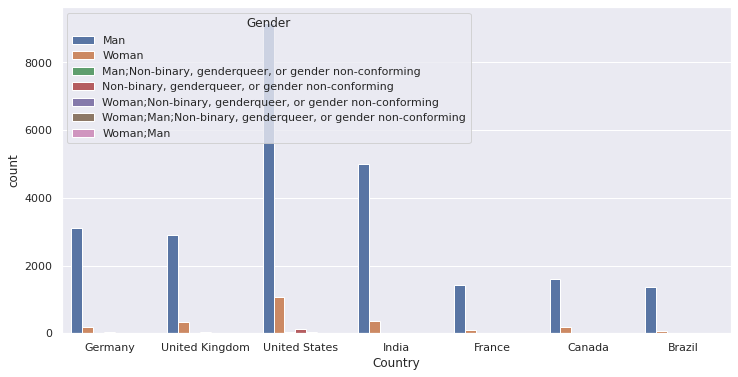

In [26]:
# distribution by gender and country, for the countries with most respondents
# set the figure size
plt.figure(figsize = [12,6])

# adapted clustered bar chart of country and gender
sns.countplot(data=df_most_repres_countries, x='Country', hue='Gender');

#### Observations regarding the distribution by gender:
- with more than 21% of the gender values missing, 71% of the respondents are male.

**Remark**

I will compute percentages relative to the entire dataset, including NaN counts. 

### Who are the developers?

In [27]:
# distribution by MainBranch professional level
df.MainBranch.value_counts(normalize=True, dropna=False) * 100

I am a developer by profession                                                   73.211709
I am a student who is learning to code                                           12.364065
I am not primarily a developer, but I write code sometimes as part of my work     8.535393
I code primarily as a hobby                                                       3.589767
I used to be a developer by profession, but no longer am                          1.835218
NaN                                                                               0.463846
Name: MainBranch, dtype: float64

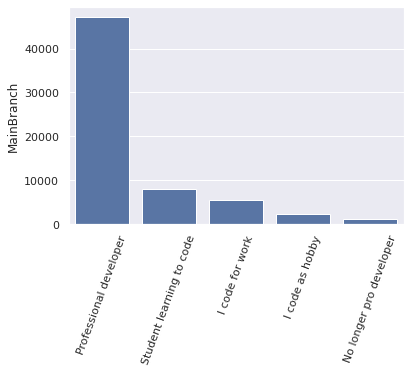

In [28]:
# plot the value counts with their categories
g = sns.barplot(x=df.MainBranch.value_counts().index, y=df.MainBranch.value_counts(), color='b');
# rotate the xticks
new_ticks = ['Professional developer', 'Student learning to code', 
             'I code for work', 'I code as hobby', 'No longer pro developer']
g.set_xticklabels(new_ticks, rotation=70);
#plt.xticks(rotation = 90);

In [30]:
# distribution by Hobbyist in percentages - if developers code as hobby
df.Hobbyist.value_counts(normalize=True, dropna=False) * 100

Yes    78.168195
No     21.761996
NaN     0.069810
Name: Hobbyist, dtype: float64

#### Observations regarding the professional distribution of the respondents:
- there are very few missing values, about 0.4%,
- more than 73% of the respondents are professional developers.

### What type of developer are you?

In [31]:
# rename the data engineer string in the full dataset
df['DevType'] = df['DevType'].str.replace('Engineer, data', 'Data engineer')

In [32]:
# respondents choose more than one answer as we can see below
developers = df.DevType.value_counts().reset_index()
developers.head(4)

,index,DevType
0,"Developer, full-stack",4424
1,"Developer, back-end",3086
2,"Developer, back-end;Developer, front-end;Developer, full-stack",2227
3,"Developer, back-end;Developer, full-stack",1476


In [33]:
# how many combinations are there
developers.shape[0]

8269

In [34]:
# rename the columns in the results dataframe
developers.rename(columns = {'index':'devChoice', 'DevType':'count'}, inplace=True)
developers.head(2)

,devChoice,count
0,"Developer, full-stack",4424
1,"Developer, back-end",3086


In [35]:
# create a list of the individual answers that can be marked by a user
dev_choice = list(developers.devChoice.str.split(';', expand=True)[0].unique())
print(dev_choice)

['Developer, full-stack', 'Developer, back-end', 'Developer, front-end', 'Developer, mobile', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 'Data scientist or machine learning specialist', 'Data or business analyst', 'Developer, QA or test', 'Designer', 'Academic researcher', 'Engineering manager', 'Data engineer', 'DevOps specialist', 'System administrator', 'Database administrator', 'Developer, game or graphics', 'Senior executive/VP', 'Scientist', 'Product manager', 'Educator', 'Engineer, site reliability', 'Marketing or sales professional']


In [95]:
# the list of types of developers working with data
data_dev = [dev_choice[6], dev_choice[7], dev_choice[12]]
print(data_dev)

['Data scientist or machine learning specialist', 'Data or business analyst', 'Data engineer']


In [38]:
# count the individual choices strings in the column DevTypes
developers_types = uf.counts_strings(dev_choice,df,'DevType')
#developers_types

In [39]:
# rename the columns in the results dataframe
developers_types.rename(columns = {'index':'DevTypes', 0:'counts'}, inplace=True)
developers_types.head(2)

,DevTypes,counts
0,"Developer, full-stack",27125
1,"Developer, back-end",27228


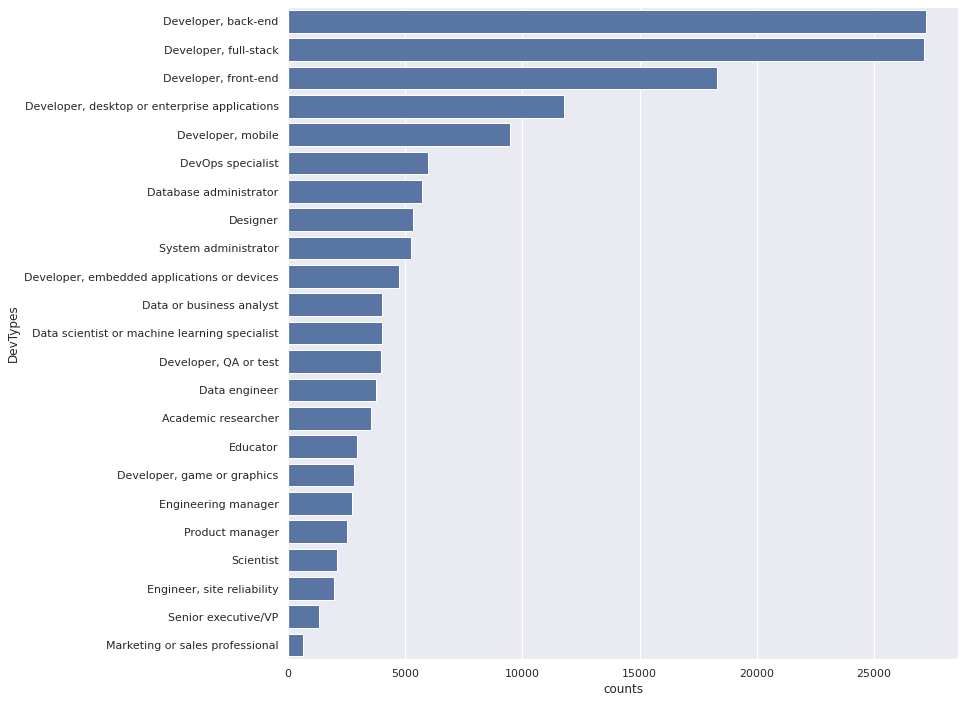

In [40]:
# set the figure size
plt.figure(figsize = [12,12])

# sort values
devs_types = developers_types.sort_values('counts', ascending=False)

# plot the value counts with their categories
sns.barplot(y=devs_types.DevTypes, x=devs_types.counts, color='b');

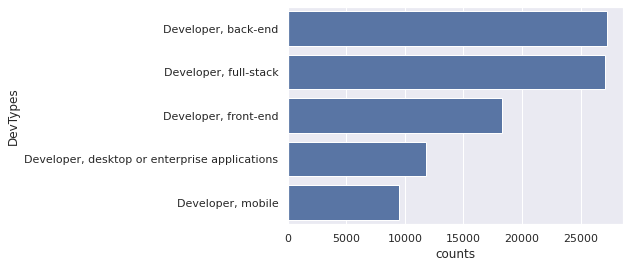

In [41]:
# sort values
devs_types = developers_types.sort_values('counts', ascending=False).head(5)

# plot the value counts with their categories
sns.barplot(y=devs_types.DevTypes, x=devs_types.counts, color='b');

#### Observations regarding the distribution of the developers types:
- most of the respondents identify themselves as back-end, full-stack or front-end developers. 

## Data preparation

1. **Create a column to split the developers in data coders and developers that do not work with data.**


In [105]:
df['DevClass'] = np.where(
    'Data ' in df['DevType'], 'data', np.where(
    'Data ' not in df['DevType'] , 'nondata', -1)) 

In [123]:
df.DevType.unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [141]:
#np.where(condition, value if condition is true, value if condition is false)
df['DevClass'] = np.where(df["DevType"].str.contains("Data ", na = False), 'data_coder', 'other_coder')
df.DevClass.value_counts()

other_coder    57746
data_coder      6715
Name: DevClass, dtype: int64

In [ ]:
df = dataframe[dataframe['Stream'].isin(options)]

In [134]:
df
def label_cat(row):
    if row.DevType.contains('Data ') is True:
        return 'data_coder'
    else:
        return 'other_coder'

df['DevClass'] = df.apply(label_cat, axis=1)


AttributeError: 'str' object has no attribute 'str'

In [127]:
df1 = pd.DataFrame({'product':['aProcedings', 'aDVD','vcd']})
def label_sub_cat(row):
    if 'Procedings' in row['product']:
        return 'Proceedings'
    elif 'DVD' in row['product']:
        return 'DVD'
    else:
        return 'Other'
df1['product_sub_cat'] = df1.apply(label_sub_cat, axis=1)

In [130]:
df1

,product,product_sub_cat
0,aProcedings,Proceedings
1,aDVD,DVD
2,vcd,Other


In [117]:
def label_cat(row):
    if 'Data' in df['DevType']:
        return 'data'
    else:
        return 'nondata'

df['DevClass'] = df['DevType'].apply(lambda x: label_cat())
apply(lambda x:x.split()[0])

TypeError: label_cat() missing 1 required positional argument: 'row'

In [116]:
df.DevType.unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

### The data coders

Look at the subset of developers who checked at least one of the options of working with big data. These options are 'Data scientist or machine learning specialist', 'Data or business analyst' and 'Engineer, data'.

In [142]:
# the subset of developers that checked at least one data related profession
data_coders = df[df["DevType"].str.contains("Data ", na = False)]
data_coders.shape

(6715, 62)

In [44]:
# the percentage of data coders among all respondents
data_coders.shape[0]/df.shape[0] * 100

13.536867253067747

In [45]:
# the developers that did not check any data related professions
other_coders = df[~df["DevType"].str.contains("Data ", na=False)]
other_coders.shape

(55735, 61)

In [46]:
# since we already used Data to split the developers
# we create an adjusted dev_choice list
dev_choice_short = [x for x in dev_choice if not 'Data ' in x]
#dev_choice_short

In [47]:
# what other DevTypes do the data coders choose
data_coders_groups = uf.counts_strings(dev_choice_short,data_coders,'DevType')
# rename the columns
data_coders_groups.rename(columns = {'index':'DevTypes', 0:'counts_data'}, inplace=True)
# add a column with percentages computed with respect to all data coders
data_coders_groups['perc_data'] = (data_coders_groups.counts_data/data_coders.shape[0] * 100).round(2)
# show the results ordered by counts and percentages
data_coders_groups.sort_values('counts_data', ascending=False).head(2)

,DevTypes,counts_data,perc_data
1,"Developer, back-end",4843,55.50
0,"Developer, full-stack",3814,43.71


In [48]:
# what DevTypes do the other developers choose
other_coders_groups = uf.counts_strings(dev_choice_short, other_coders,'DevType')
# rename the columns in the results table
other_coders_groups.rename(columns = {'index':'DevTypes', 0:'counts_other'}, inplace=True)
# add a column with percentages computed with respect to all other coders
other_coders_groups['perc_other'] = (other_coders_groups.counts_other/other_coders.shape[0] * 100).round(2)
# show the results ordered by counts
other_coders_groups.sort_values('counts_other', ascending=False).head(2)

,DevTypes,counts_other,perc_other
0,"Developer, full-stack",23311,41.82
1,"Developer, back-end",22385,40.16


In [50]:
# plot the data side by side
temp_groups = pd.merge(data_coders_groups, other_coders_groups, on='DevTypes')

# horizontal barplot with the percentages 
#sided_plot = temp_groups.plot(x = 'DevTypes', y = ['perc_data','perc_other'], 
                              #kind='barh', figsize=(10, 10));
#plt.xlabel('');

#### Observations regarding DevTypes barplot:
- this barplot is misleading since the developers choose more than one DevType, and the sums of percentages add to different values.

# Education related information

I will address now the first question I am interested in: 
> Do data developers have more formal educational background than the other developers? In particular, are there more data developers that major in math or stats? How is the education level related to job satisfaction and compensation? 

There are three questions regarding the education that I am interested in. These correspond to the columns `EdLevel`, '`NewEdImpt`, `UndergradMajor`. I am also interested in how these options are related to salary, i.e. `ConvertedComp` and `JobSat`.

In [51]:
# create the short list of columns for the temporary dataframes
short_list_columns = ['Respondent', 'MainBranch', 'ConvertedComp', 
                     'Country', 'DevType', 'EdLevel', 'JobSat', 'NEWEdImpt',
                      'UndergradMajor', 'WorkWeekHrs']

In [52]:
# create a temporary dataframe with data coders for the tasks related to the education questions
data_ed = data_coders.loc[:, short_list_columns]
data_ed.head(2)

,Respondent,MainBranch,ConvertedComp,Country,DevType,EdLevel,JobSat,NEWEdImpt,UndergradMajor,WorkWeekHrs
21,22,I am a developer by profession,NaN,India,"Developer, full-stack;Data engineer","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Slightly dissatisfied,Very important,"Computer science, computer engineering, or software engineering",50.0
24,25,I am a developer by profession,NaN,Portugal,"Developer, back-end;Developer, full-stack;DevOps specialist;Data engineer;System administrator","Associate degree (A.A., A.S., etc.)",Neither satisfied nor dissatisfied,Critically important,"Computer science, computer engineering, or software engineering",40.0


In [53]:
# create a temporary dataframe with data coders for the tasks related to the education questions
other_ed = other_coders.loc[:, short_list_columns]
other_ed.head(2)

,Respondent,MainBranch,ConvertedComp,Country,DevType,EdLevel,JobSat,NEWEdImpt,UndergradMajor,WorkWeekHrs
0,1,I am a developer by profession,NaN,Germany,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly satisfied,Fairly important,"Computer science, computer engineering, or software engineering",50.0
1,2,I am a developer by profession,NaN,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Very dissatisfied,Fairly important,"Computer science, computer engineering, or software engineering",NaN


In [58]:
# get the question about education level
dfs[dfs.Column == 'EdLevel']['QuestionText']

3    What is your age (in years)? If you prefer not to answer, you may leave this question blank.
Name: QuestionText, dtype: object

In [63]:
# get the choices for the education level question
df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [73]:
data_coders.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school',
       nan, 'I never completed any formal education'], dtype=object)

In [59]:
# get the question about undergraduate degree
dfs[dfs.Column == 'UndergradMajor']['QuestionText']

54    What was your primary field of study?
Name: QuestionText, dtype: object

In [84]:
#data['Product_Name'] = data['Product_Name'].replace(data['Size_Name'],'', regex = True)
str_rep = '(e.g. American high school, German Realschule or Gymnasium, etc.)'
#ata_coder = data_coders.copy()
data_coder = data_coders.replace({'(e.g. American high school, German Realschule or Gymnasium, etc.)': 'a'})
#data_coders['EdLevel'] = data_coders['EdLevel'].replace(data_coders['Size_Name'],'', regex = True)

In [94]:
data_coders.replace(regex=str_rep, value='', inplace=True)
data_coders.EdLevel[23:33]

df.replace(regex={r'^ba.$': 'new', 'foo': 'xyz'})

173                                 Primary/elementary school
185                Other doctoral degree (Ph.D., Ed.D., etc.)
186              Bachelor’s degree (B.A., B.S., B.Eng., etc.)
190              Bachelor’s degree (B.A., B.S., B.Eng., etc.)
194           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
219           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
224    Some college/university study without earning a degree
233           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
236                                      Secondary school (a)
238              Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Name: EdLevel, dtype: object

In [93]:
data_coders.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Secondary school (a)', 'Professional degree (JD, MD, etc.)',
       'Primary/elementary school', nan,
       'I never completed any formal education'], dtype=object)

In [83]:
# get the choices for the undergraduate degree
df.UndergradMajor.unique()

array(['Computer science, computer engineering, or software engineering',
       nan, 'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'Information systems, information technology, or system administration',
       'Web development or web design',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)'],
      dtype=object)

In [62]:
# get the question about education importance
dfs[dfs.Column == 'NEWEdImpt']['QuestionText']

29    How important is a formal education, such as a university degree in computer science, to your career?
Name: QuestionText, dtype: object

In [65]:
# get the choices for the education importance question
df.NEWEdImpt.unique()

array(['Fairly important', nan, 'Not at all important/not necessary',
       'Very important', 'Somewhat important', 'Critically important'],
      dtype=object)

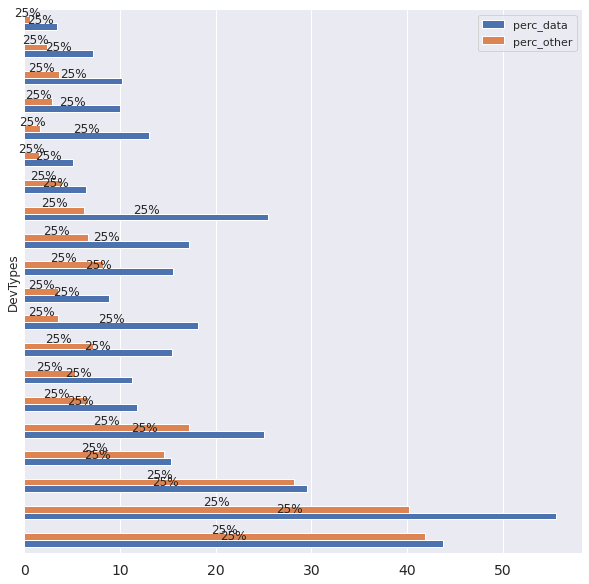

In [98]:
# plot the data side by side
temp_groups = pd.merge(data_coders_groups, other_coders_groups, on='DevTypes')

# horizontal barplot with the percentages 
sided_plot = temp_groups.plot(x = 'DevTypes', y = ['perc_data','perc_other'], 
                              kind='barh', figsize=(10, 10));
plt.xlabel('')

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in sided_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    sided_plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [ ]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Normalize result
result_pct = result.div(result.sum(1), axis=0)

ax = result_pct.plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=result.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [235]:
def df_counts(dff, old_col, new_col, perc_name):
    new_dff = pd.DataFrame(dff[old_col].value_counts()/dff.shape[0]).reset_index()
    new_dff.rename(columns = {'index': new_col, old_col: perc_name}, inplace=True)
    return new_dff
    

In [290]:
other_perc = df_counts(other_coders, 'EdLevel', 'Education', 'other_counts')
data_perc = df_counts(data_coders, 'EdLevel', 'Education', 'data_counts')
all_perc = df_counts(df, 'EdLevel', 'Education', 'all_counts')

In [291]:
# merge the three databases
#df_temp = pd.merge(all_perc, other_perc, on = 'Education')
#df_temp_new = pd.merge(df_temp, data_perc, on = 'Education')
#df_temp_new

In [292]:
# create a new list of eductation levels for better graphics
new_ed = ['Bachelor degree','Master degree','Some college/No degree','Secondary school', 
          'Associate degree',
 'Doctoral degree','Primary/elementary school','Professional degree','No formal education']

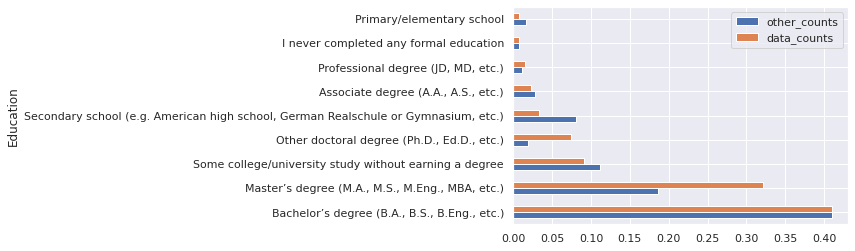

In [305]:
# plot the data
temp_ed = merge_df(data_perc, other_perc, 'Education')
sided_plot = temp_ed.plot(x = 'Education', y = ['other_counts','data_counts'], kind="barh")
plt.xlabel('');


In [296]:
# create the dataframes with percentages
data_major = df_counts(data_coders, 'UndergradMajor', 'Major', 'data_counts')
others_major = df_counts(other_coders, 'UndergradMajor', 'Major', 'other_counts')


In [300]:
data_major

,Major,data_counts
0,"Computer science, computer engineering, or software engineering",0.478455
1,"Another engineering discipline (such as civil, electrical, mechanical, etc.)",0.111047
2,Mathematics or statistics,0.074146
3,"Information systems, information technology, or system administration",0.070594
4,"A natural science (such as biology, chemistry, physics, etc.)",0.067958
5,"A business discipline (such as accounting, finance, marketing, etc.)",0.042173
6,"A social science (such as anthropology, psychology, political science, etc.)",0.030140
7,"A humanities discipline (such as literature, history, philosophy, etc.)",0.016846
8,Web development or web design,0.013637
9,I never declared a major,0.006761


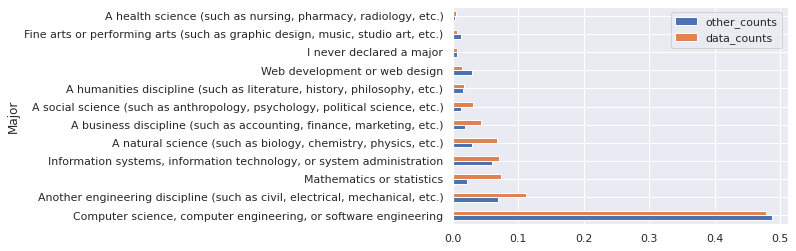

In [304]:
# plot the data
temp_major = merge_df(data_major, others_major, 'Major')
sided_plot = temp_major.plot(x = 'Major', y = ['other_counts','data_counts'], kind="barh")
plt.xlabel('');


In [306]:
data_coders.Gender.value_counts()/data_coders.shape[0]

Man                                                            0.785010
Woman                                                          0.065780
Non-binary, genderqueer, or gender non-conforming              0.005386
Man;Non-binary, genderqueer, or gender non-conforming          0.003209
Woman;Non-binary, genderqueer, or gender non-conforming        0.001948
Woman;Man                                                      0.001604
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.000917
Name: Gender, dtype: float64

In [307]:
other_coders.Gender.value_counts()/other_coders.shape[0]

Man                                                            0.693163
Woman                                                          0.060077
Non-binary, genderqueer, or gender non-conforming              0.006088
Man;Non-binary, genderqueer, or gender non-conforming          0.001646
Woman;Non-binary, genderqueer, or gender non-conforming        0.001359
Woman;Man                                                      0.000976
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.000325
Name: Gender, dtype: float64

### Look over questions and identify columns to drop

In [54]:
pd.set_option('display.max_colwidth', None)
# take a look at the questions - first part
#dfs.head(30)

In [53]:
# take a look at the questions, part 2
#dfs.tail(31)

In [148]:
# list of columns not used in our analysis
drop_cols = ['CompFreq', 'CompTotal', 'CurrencyDesc', 'CurrencySymbol',
             'Ethnicity', 'NEWOffTopic', 'NEWOnboardGood', 
             'NEWOtherComms', 'NEWPurchaseResearch', 
             'PurchaseWhat', 'Sexuality', 'SOComm', 
             'SurveyEase', 'SurveyLength', 'Trans',  'WelcomeChange',
             'Age','Age1stCode','YearsCode','YearsCodePro']

In [149]:
# make a copy of the dataframe
df1 = df.copy()

# drop all the columns in the list drop_cols
df1 = df1.drop(drop_cols, axis = 1)

# check the shape of the new dataset
df1.shape

(64461, 41)

In [150]:
# rename the data engineer string
df1['DevType'] = df1['DevType'].str.replace('Engineer, data', 'Data engineer')

In [144]:
# print the question of interest
list(dfs[dfs.Column == 'NEWOvertime']['QuestionText'])

['How often do you work overtime or beyond the formal time expectation of your job?']

In [158]:
# print the question of interest
list(dfs[dfs.Column == 'DevType']['QuestionText'])

['Which of the following describe you? Please select all that apply.']

In [ ]:
# an example of a query on data
pd.DataFrame(df.query(condition).groupby(['Gender', 'FormalEducation']).mean()['Salary'])

In [72]:
# create empty dictionary, which will hold info [method]: count
my_count = {}
# iterate through possible answers
for entry in dev_choice:
    my_count[entry] = df1.DevType.str.contains(entry).sum()
# check the counts dictionary
my_count

{'developer, full-stack': 27125,
 'developer, back-end': 27228,
 'developer, front-end': 18296,
 'developer, mobile': 9482,
 'developer, desktop or enterprise applications': 11784,
 'developer, embedded applications or devices': 4750,
 'data scientist or machine learning specialist': 3988,
 'data or business analyst': 4024,
 'developer, qa or test': 3947,
 'designer': 5321,
 'academic researcher': 3552,
 'engineering manager': 2724,
 'engineer, data': 3738,
 'devops specialist': 5969,
 'system administrator': 5242,
 'database administrator': 5722,
 'developer, game or graphics': 2789,
 'senior executive/vp': 1320,
 'scientist': 5179,
 'product manager': 2497,
 'educator': 2928,
 'engineer, site reliability': 1940,
 'marketing or sales professional': 642,
 'non': 15091}

In [74]:
df1_data = df1[df1.DevType.str.contains('data ')]
df1_data.shape

(6715, 51)

In [107]:
# make dataframe from dictionary
data_pd = pd.DataFrame(pd.Series(my_count_datas)).reset_index()

# rename the columns in the results dataframe
data_pd.rename(columns = {'index':'devChoice', 0:'counts'}, inplace=True)
data_pd_sort = data_pd.sort_values('counts', ascending=False)
data_pd_sort.head(10)

,devChoice,counts
18,scientist,4999
7,data or business analyst,4024
6,data scientist or machine learning specialist,3988
1,"developer, back-end",3470
0,"developer, full-stack",2838
2,"developer, front-end",1925
15,database administrator,1793
12,"engineer, data",1727
4,"developer, desktop or enterprise applications",1683
10,academic researcher,1409


In [108]:
data_pd_sort.drop([7, 6, 12, 23], inplace=True)

In [109]:
data_pd_sort

,devChoice,counts
18,scientist,4999
1,"developer, back-end",3470
0,"developer, full-stack",2838
2,"developer, front-end",1925
15,database administrator,1793
4,"developer, desktop or enterprise applications",1683
10,academic researcher,1409
14,system administrator,1149
9,designer,1059
3,"developer, mobile",1027


In [121]:
# set the figure size
plt.figure(figsize = [12,6])
df1_data["dataPeople"] = df1_data["DevType"].isin(["data "])

# adapted clustered bar chart of country and gender
sns.barplot(data=df1_data, x = 'counts', y ='devChoice', hue='dataPeople');

ValueError: min() arg is an empty sequence

<Figure size 864x432 with 0 Axes>

In [40]:

df["Name"]= df["Name"].str.lower()
# count occurrences of each developer choice
dev_counts = count_strings(dev_choices, developers, 'devChoice', 'count')
# look at these results as percentages
dev_counts['perc'] = dev_counts['count']/np.sum(dev_counts['count'])
# sort the values in decreasing order of counts/percentage
dev_counts.sort_values(by='count', ascending=False).round(3)

,devChoice,count,perc
1,"Developer, back-end",54456,0.167
0,"Developer, full-stack",54250,0.166
2,"Developer, front-end",36592,0.112
4,"Developer, desktop or enterprise applications",23568,0.072
3,"Developer, mobile",18964,0.058
7,Data or business analyst,12072,0.037
6,Data scientist or machine learning specialist,11964,0.037
13,DevOps specialist,11938,0.037
15,Database administrator,11444,0.035
12,"Engineer, data",11214,0.034


In [ ]:
#replace NaN with the string none in DevType column
df_copy[['DevType']] = df_copy[['DevType']].fillna('none')

# dataframe that contains the data developers
df_data = df_copy[df_copy.DevType.str.contains('Data |, data')]
df_data.head(6)

In [ ]:
df_data.shape

### Question

For those who identify as working with data, what other type of developers they choose?

In [ ]:
df_copy[['DevType']] = df_copy[['DevType']].fillna('none') # Specific columns
df_copy.head()

In [ ]:
# drop those rows that have null values in DevType column
df1 = df.dropna(subset=['DevType'], axis=0)
df1.shape

In [ ]:
# find all entries that contain data option 
# use pd.series.str.contains(pat, case=True, flags=0, na=nan, regex=True)
contain_datas = df1[df1['DevType'].str.contains('Data', case=False)]
contain_datas.shape

In [ ]:
# check the dataframe
contain_datas.head(4)

In [ ]:
df_temp = df['DevType'].dropna(axis=0).reset_index(drop=True)


In [ ]:
df_temp[df_temp['DevType'].str.contains("Data scientist or machine learning specialist")]

In [ ]:
df20.info().isnull().sum()

In [ ]:
df20['DevType'].isnull().sum()

In [ ]:
desc = list(df20s[df20s.Column == 'DevType']['QuestionText'])[0]
desc

In [ ]:
print(list(df20['DevType'].unique()))

In [ ]:
datas = df20['DevType'].value_counts()
datas

In [ ]:
# create a list of the individual answers that are marked by a user
# this is also available in the documentation
pd_series = df20['DevType']
pos_values = pd_series.str.split(';', expand=True)[0].unique()
pos_values